In [152]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as nd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [153]:
df = pd.read_excel('preprocessing.xlsx')

In [154]:
# # categorical columns encoding
# categorical_columns = ['Pclass', 'Sex']
# for col in categorical_columns:
#     le = preprocessing.LabelEncoder()
#     le.fit(df[col].values)
#     df[col] = le.transform(df[col].values)

In [155]:
# train, test, validation data split
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

In [156]:
y_train = train.pop('Survived')
y_test = test.pop('Survived')
y_val = val.pop('Survived')

In [158]:
dtrain = xgb.DMatrix(data=train, label=y_train)
dval = xgb.DMatrix(data=val, label=y_val)
dtest = xgb.DMatrix(data=test, label=y_test)

In [159]:
params = {'max_depth':3,
         'eta':0.1,
         'objective':'binary:logistic',
         'eval_metric':'logloss',
         'early_stoppings':100}

num_rounds=400

In [166]:
w_list = [(dtrain,'train'),(dval,'test')]
xgb_ml = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,\
                  early_stopping_rounds=300, evals=w_list)

[16:01:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.64913	test-logloss:0.65285
[1]	train-logloss:0.61284	test-logloss:0.61948
[2]	train-logloss:0.58167	test-logloss:0.59190
[3]	train-logloss:0.55630	test-logloss:0.56885
[4]	train-logloss:0.53392	test-logloss:0.54857
[5]	train-logloss:0.51556	test-logloss:0.53332
[6]	train-logloss:0.49913	test-logloss:0.51901
[7]	train-logloss:0.48565	test-logloss:0.50853
[8]	train-logloss:0.47343	test-logloss:0.49767
[9]	train-logloss:0.46397	test-logloss:0.48968
[10]	train-logloss:0.45460	test-logloss:0.48381
[11]	train-logloss:0.44646	

In [167]:
pred_probs = xgb_ml.predict(dtest)
pred=[1 if x > 0.5 else 0 for x in pred_probs]

In [168]:
eq = pred == y_test
eq.sum(axis= 0) / eq.count()

0.7374301675977654

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

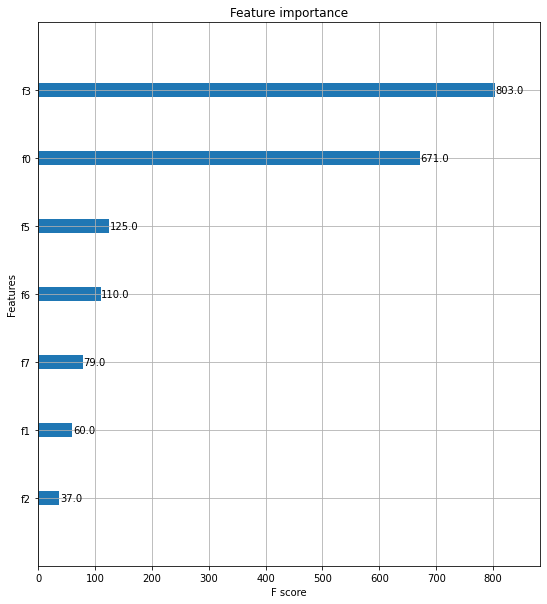

In [163]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,10))
plot_importance(xgb_ml, ax=ax)

In [164]:
xgb_ml.save_model('xgb_model.txt')

In [165]:
test_df = pd.read_excel('test.xlsx')
PassengerId = test_df
test_df = test_df.drop(columns='PassengerId')
test_df = xgb.DMatrix(data=test_df)
pred_probs = xgb_ml.predict(test_df)
pred=[1 if x > 0.5 else 0 for x in pred_probs]
submission = pd.DataFrame({"PassengerId": PassengerId['PassengerId'], "Survived":pred})
submission.to_csv('submission.csv', index=False)